In [8]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML programming/data/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [7]:
data = df.drop(["Volume", "Adj Close", "Date"], axis=1)
data.head()

,Open,High,Low,Close
0,3.800,5.000,3.508,4.778
1,5.158,6.084,4.660,4.766
2,5.000,5.184,4.054,4.392
3,4.600,4.620,3.742,3.840
4,4.000,4.000,3.166,3.222


In [22]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [19]:
# 3. 시퀀스 생성
window = 7
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window, 3])
X, y = np.array(X), np.array(y)
X.shape, y.shape

[]


((2949, 7, 4), (2949,))

In [27]:
rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 7, 64)          │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,553 (29.50 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 4. LSTM 모델
lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window, 4)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])
lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Train data shape: (2359, 7, 4)
Test data shape: (590, 7, 4)


In [30]:
# RNN 훈련
rnn.compile(loss='mse', optimizer='adam')

print("\n--- 모델 훈련 시작 ---")
history = rnn.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32
)
print("--- 모델 훈련 완료 ---")


--- 모델 훈련 시작 ---
Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0011
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1120e-06
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7116e-06
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5640e-06
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6596e-06
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2027e-06
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0356e-06
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7668e-06
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9601e-06
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2767e-06
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6057e-06
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2190e-06
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8121e-06
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8917e-06
Epoch 15/50
74

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
테스트 세트 MSE: 0.047379


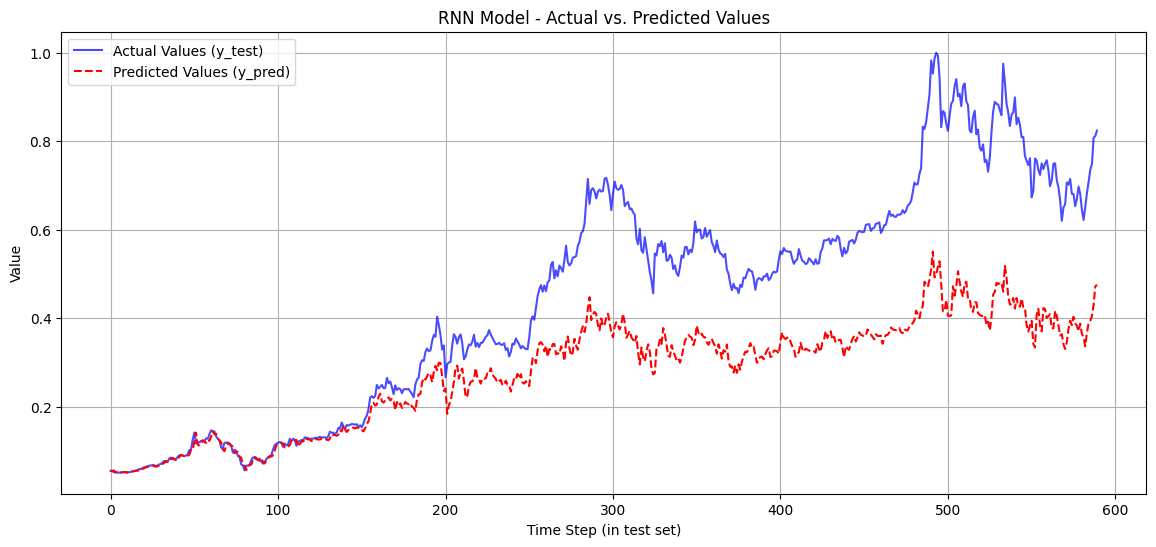

In [32]:
#RNN 평가
y_pred = rnn.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred.flatten())
print(f"테스트 세트 MSE: {mse_sklearn:.6f}")


# 8. 실제 값 vs 예측 값 비교 그래프
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values (y_test)', color='blue', alpha=0.7)
plt.plot(y_pred.flatten(), label='Predicted Values (y_pred)', color='red', linestyle='--')
plt.title('RNN Model - Actual vs. Predicted Values')
plt.xlabel('Time Step (in test set)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
#LSTM 훈련
lstm.compile(loss='mse', optimizer='adam')

print("\n--- LSTM 모델 훈련 시작 ---")
history = lstm.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32
)
print("--- LSTM 모델 훈련 완료 ---")


--- LSTM 모델 훈련 시작 ---
Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.3518e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0520e-06
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9023e-06
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6743e-06
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8711e-06
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7592e-06
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.6938e-06
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9470e-06
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5720e-06
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0877e-06
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6864e-06
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7482e-06
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9521e-06
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1507e-06
Epo

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
테스트 세트 MSE: 0.005220


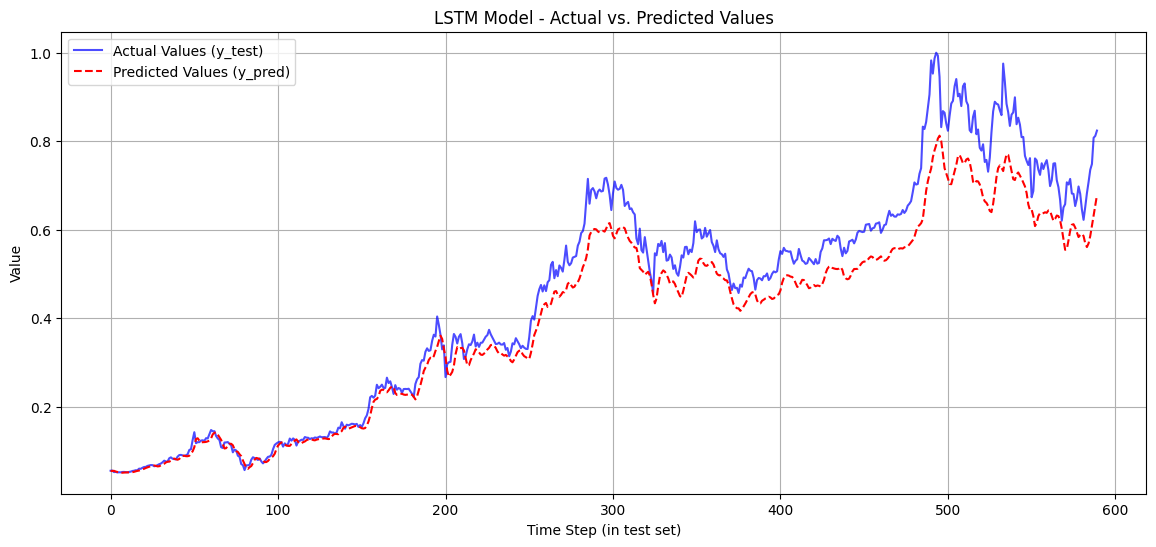

In [35]:
#LSTM 테스트
y_pred = lstm.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred.flatten())
print(f"테스트 세트 MSE: {mse_sklearn:.6f}")

plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values (y_test)', color='blue', alpha=0.7)
plt.plot(y_pred.flatten(), label='Predicted Values (y_pred)', color='red', linestyle='--')
plt.title('LSTM Model - Actual vs. Predicted Values') # 제목 변경
plt.xlabel('Time Step (in test set)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()